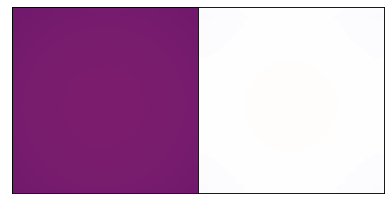

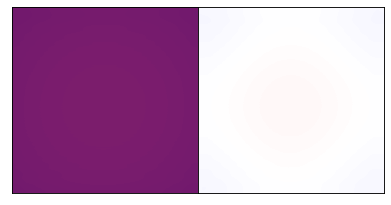

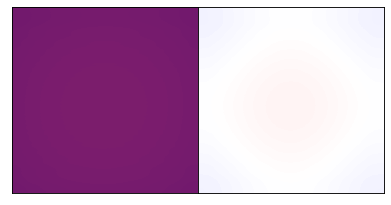

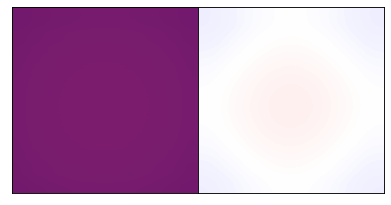

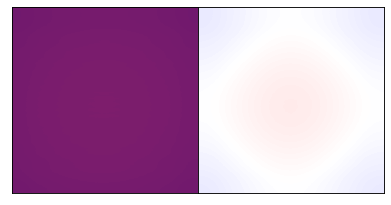

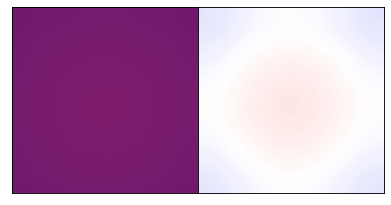

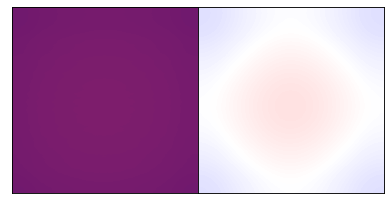

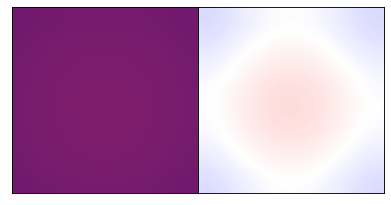

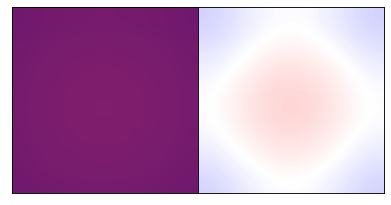

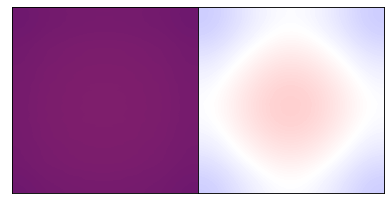

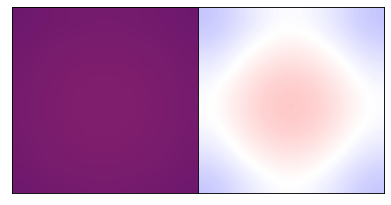

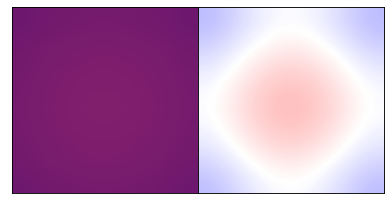

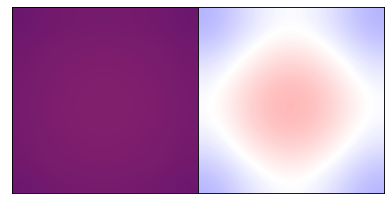

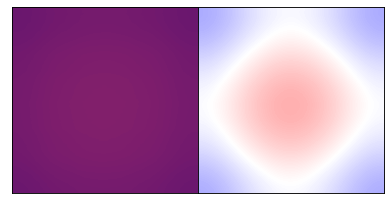

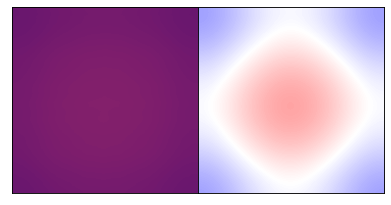

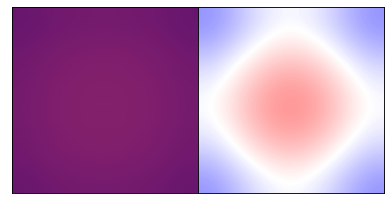

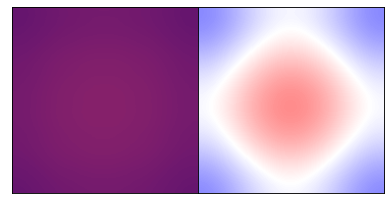

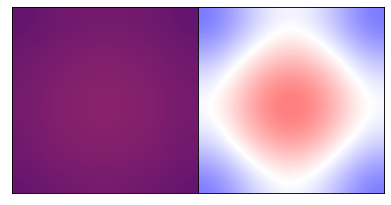

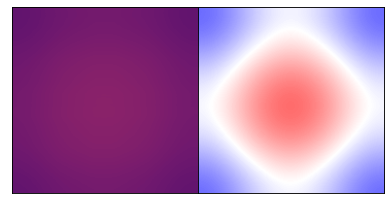

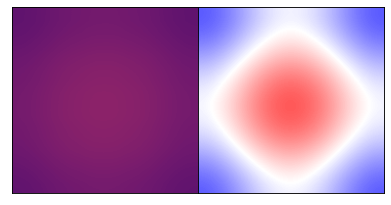

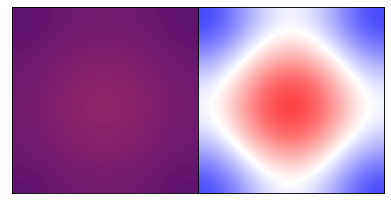

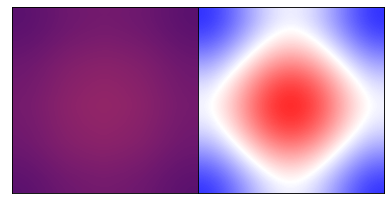

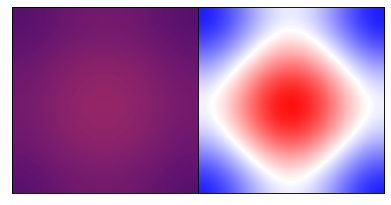

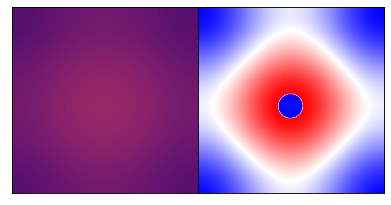

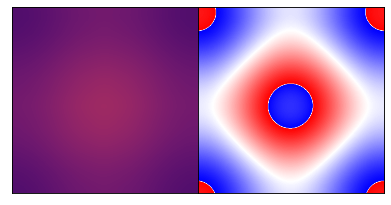

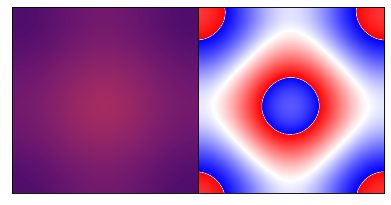

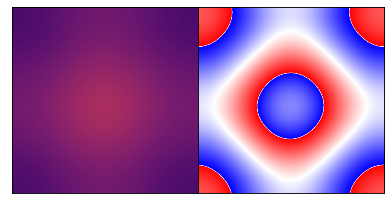

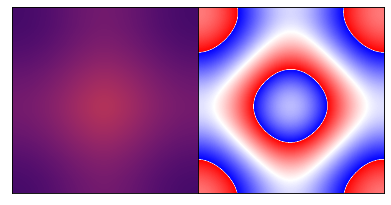

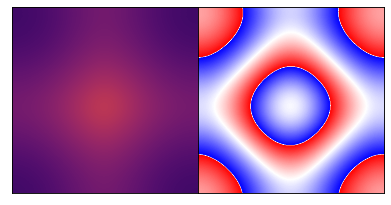

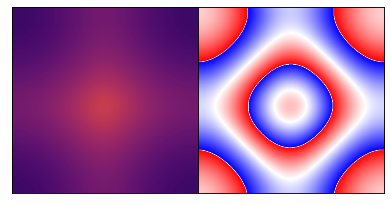

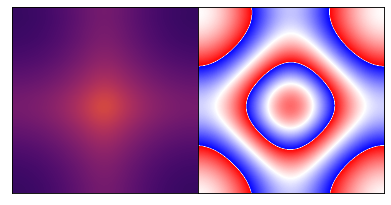

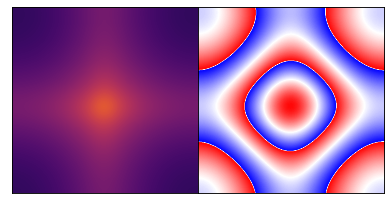

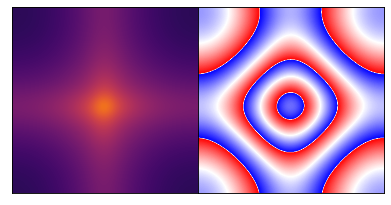

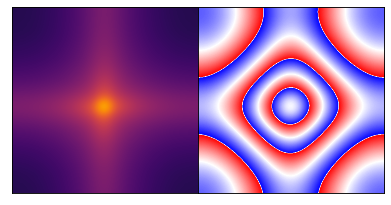

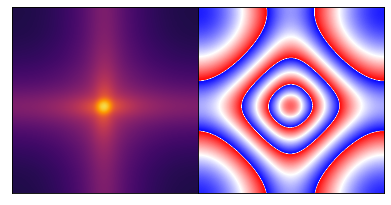

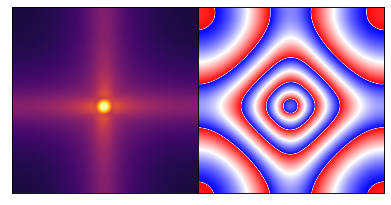

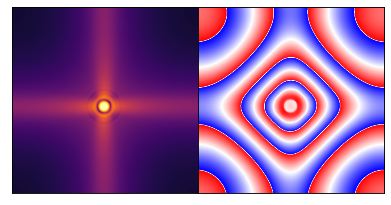

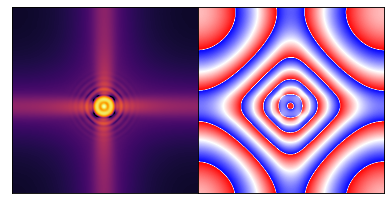

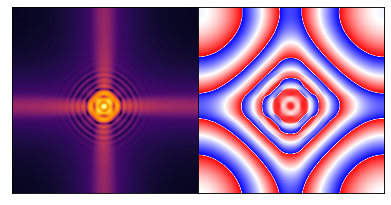

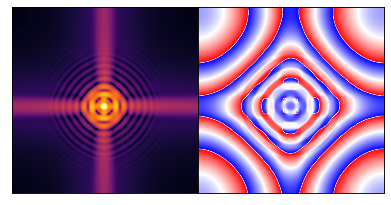

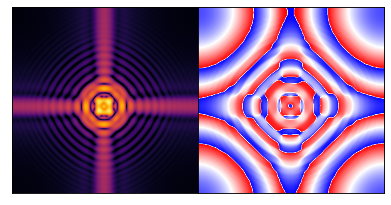

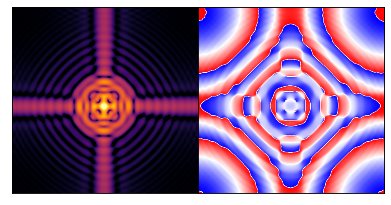

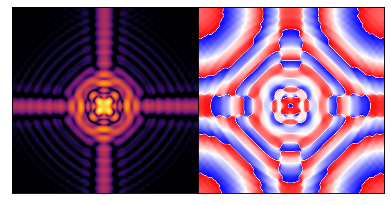

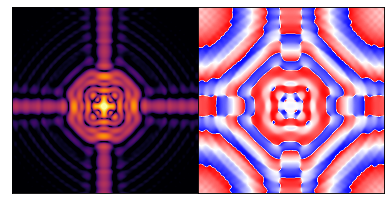

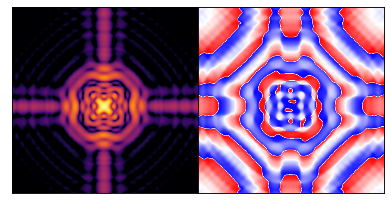

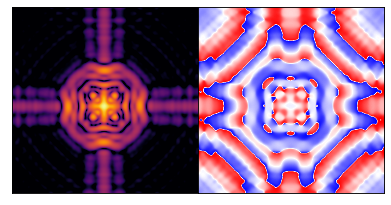

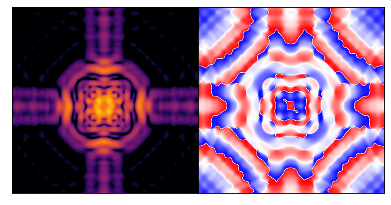

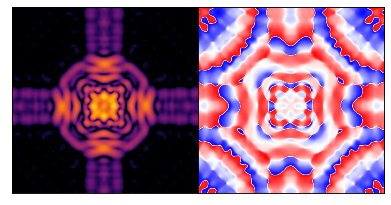

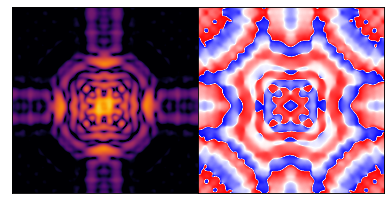

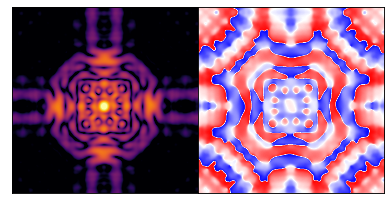

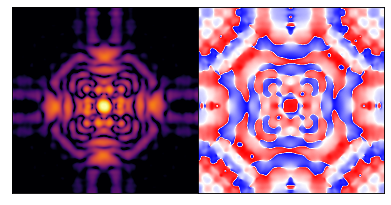

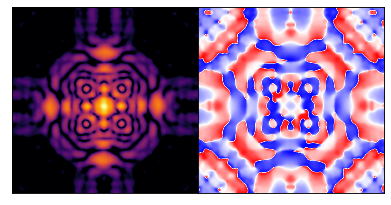

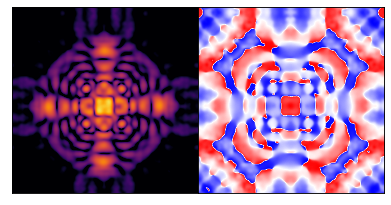

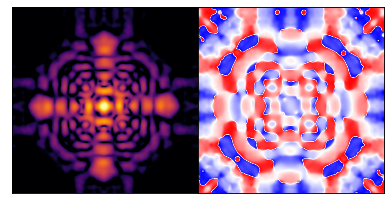

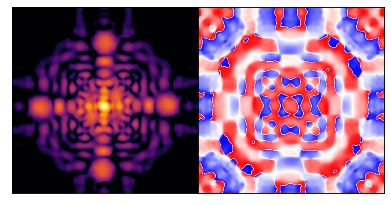

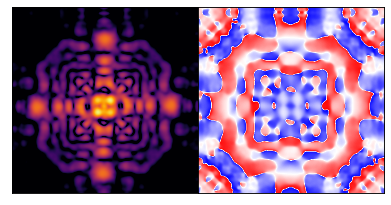

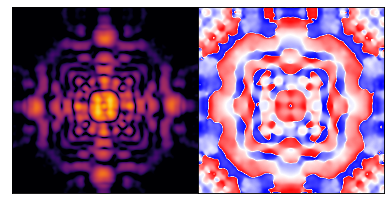

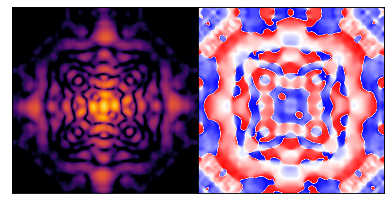

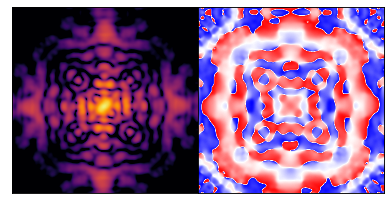

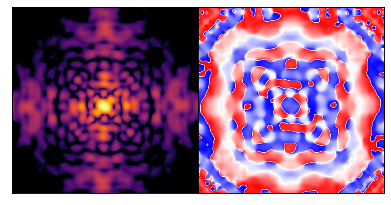

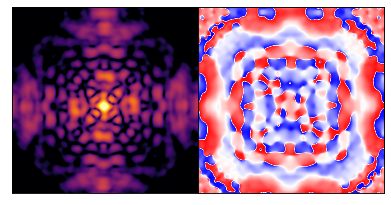

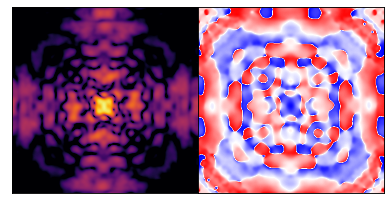

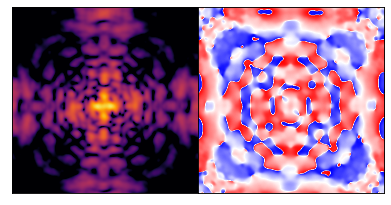

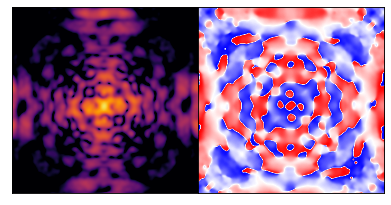

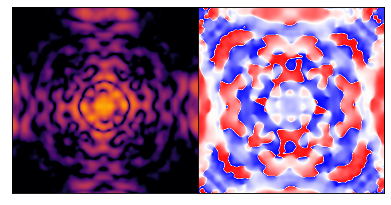

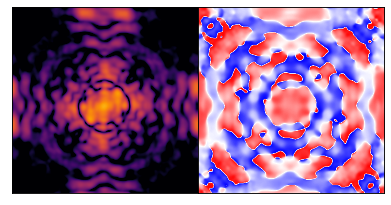

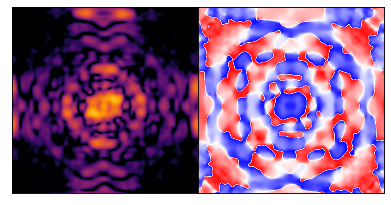

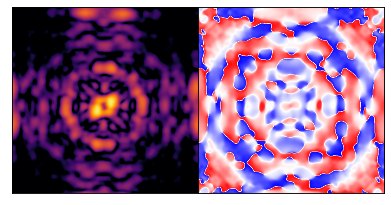

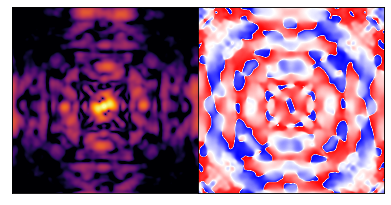

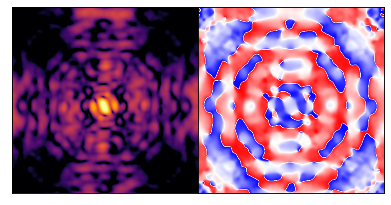

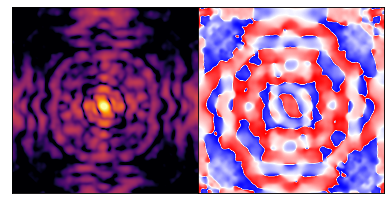

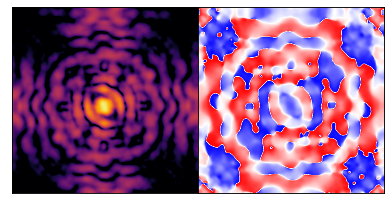

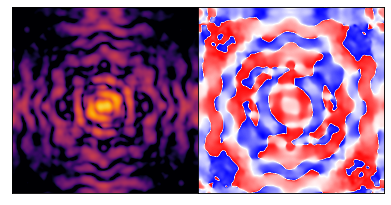

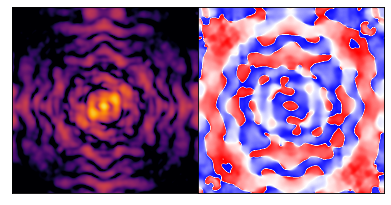

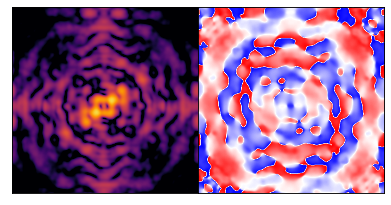

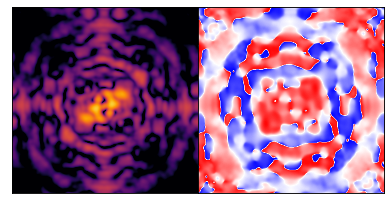

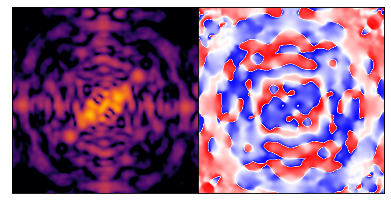

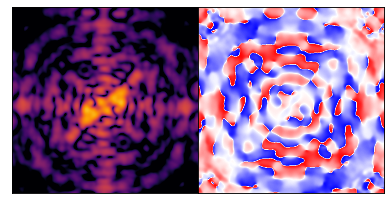

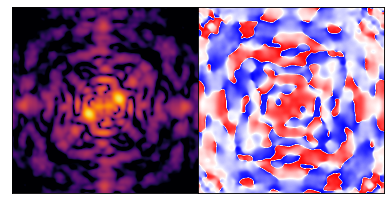

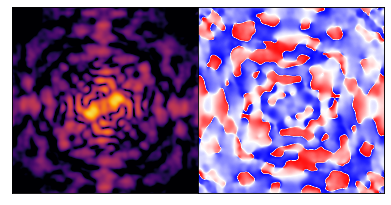

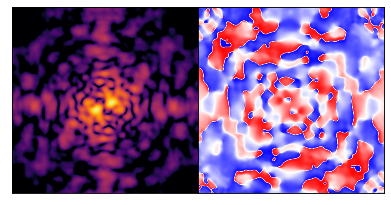

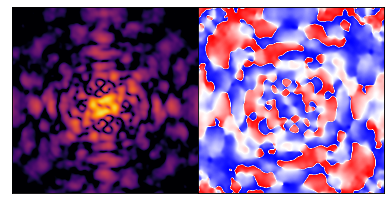

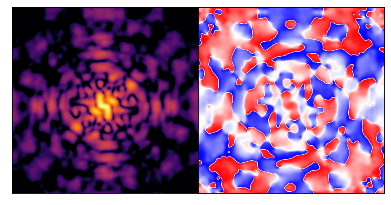

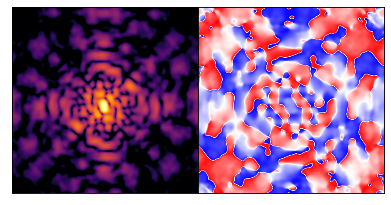

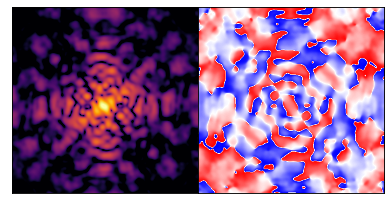

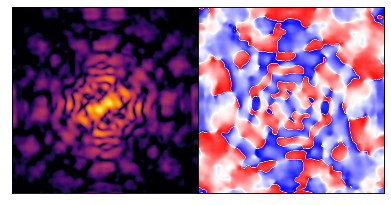

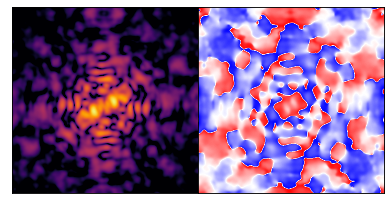

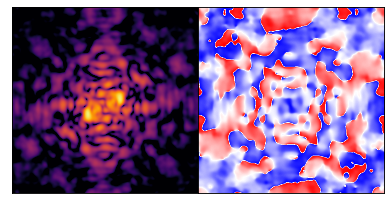

KeyboardInterrupt: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, cuda

"""
Create Your Own Quantum Mechanics Simulation (With Python)
Philip Mocz (2020) Princeton Univeristy, @PMocz

Simulate the Schrodinger-Poisson system with the Spectral method
""" 
def main():
	""" Quantum simulation """
	
	# Simulation parameters
	N         = 512    # Spatial resolution
	t         = 0      # current time of the simulation
	tEnd      = 0.99    # time at which simulation ends
	dt        = 0.0005  # timestep
	tOut      = 0.0005  # draw frequency
	G         = 4000  # Gravitaitonal constant
	plotRealTime = True # switch on for plotting as the simulation goes along
	
	# Domain [0,1] x [0,1]
	L = 1    
	xlin = np.linspace(0,L, num=N+1)  # Note: x=0 & x=1 are the same point!
	xlin = xlin[0:N]                     # chop off periodic point
	xx, yy = np.meshgrid(xlin, xlin)
	
	# Intial Condition
	amp = 0.90
	sigma = 0.9
	rho = 0.9
	rho+= 2*amp*np.exp(-((xx-0.5)**2+(yy-0.5)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
	rho+= 1.5*amp*np.exp(-((xx-0.2)**2+(yy-0.7)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
	rho+= amp*np.exp(-((xx-0.4)**2+(yy-0.6)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
	rho+= amp*np.exp(-((xx-0.6)**2+(yy-0.8)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
	rho+= amp*np.exp(-((xx-0.8)**2+(yy-0.2)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
	rho+= amp*np.exp(-((xx-0.6)**2+(yy-0.7)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
	rho+= amp*np.exp(-((xx-0.7)**2+(yy-0.4)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
	rho+= amp*np.exp(-((xx-0.3)**2+(yy-0.3)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
	# normalize wavefunction to <|psi|^2>=1
	rhobar = np.mean( rho )
	rho /= rhobar
	psi = np.sqrt(rho)
	
	# Fourier Space Variables
	klin = 2.0 * np.pi / L * np.arange(-N/2, N/2)
	kx, ky = np.meshgrid(klin, klin)
	kx = np.fft.ifftshift(kx)
	ky = np.fft.ifftshift(ky)
	kSq = kx**2 + ky**2
	
	# Potential
	Vhat = -np.fft.fftn(4.0*np.pi*G*(np.abs(psi)**2-1.0)) / ( kSq  + (kSq==0))
	V = np.real(np.fft.ifftn(Vhat))
	
	# number of timesteps
	Nt = int(np.ceil(tEnd/dt))
	
	# prep figure
	fig = plt.figure(figsize=(6,4), dpi=80)
	grid = plt.GridSpec(1, 2, wspace=0.0, hspace=0.0)
	ax1 = plt.subplot(grid[0,0])
	ax2 = plt.subplot(grid[0,1])
	outputCount = 1
	
	# Simulation Main Loop
	for i in range(Nt):
		# (1/2) kick
		psi = np.exp(-1.j*dt/2.0*V) * psi
		
		# drift
		psihat = np.fft.fftn(psi)
		psihat = np.exp(dt * (-1.j*kSq/2.))  * psihat
		psi = np.fft.ifftn(psihat)
		
		# update potential
		Vhat = -np.fft.fftn(4.0*np.pi*G*(np.abs(psi)**2-1.0)) / ( kSq  + (kSq==0))
		V = np.real(np.fft.ifftn(Vhat))
		
		# (1/2) kick
		psi = np.exp(-1.j*dt/2.0*V) * psi
		
		# update time
		t += dt
		
		# plot in real time
		plotThisTurn = False
		if t + dt > outputCount*tOut:
			plotThisTurn = True
		if (plotRealTime and plotThisTurn) or (i == Nt-1):
			
			plt.sca(ax1)
			plt.cla()
			
			plt.imshow(np.log10(np.abs(psi)**2), cmap = 'inferno')
			plt.clim(-1, 2)
			ax1.get_xaxis().set_visible(False)
			ax1.get_yaxis().set_visible(False)	
			ax1.set_aspect('equal')	
			
			plt.sca(ax2)
			plt.cla()
			plt.imshow(np.angle(psi), cmap = 'bwr')
			plt.clim(-np.pi, np.pi)
			ax2.get_xaxis().set_visible(False)
			ax2.get_yaxis().set_visible(False)	
			ax2.set_aspect('equal')	
			
			plt.pause(0.001)
			outputCount += 1
			
			
	# Save figure
	plt.sca(ax1)
	plt.title(r'$\log_{10}(|\psi|^2)$')
	plt.sca(ax2)
	plt.title(r'${\rm angle}(\psi)$')
	plt.savefig('quantumspectral.png',dpi=240)
	plt.show()
	
	return 0
	


  
if __name__== "__main__":
  main()
 